<a href="https://colab.research.google.com/github/kiki4510/Netflix-contents-Analysis/blob/main/Netflix_Contents_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 넷플릭스 컨텐츠 분석

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('netflixData.csv')
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


## EDA

In [25]:
#제목에 있는 해쉬태그를 제거
def delhash(string):
    return string.replace('#','')

df['Title'] = df['Title'].apply(delhash)

In [27]:
df['Production Country'] = df['Production Country'].fillna(df['Production Country'].mode()[0])
df =df.fillna('None')
df.drop_duplicates(inplace= True)
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,None,Reality TV,None,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,None
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,blackAF,Kenya Barris and his family navigate relations...,None,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,None
4,7f2d4170-bab8-4d75-adc2-197f7124c070,cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",None,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [28]:
#누락값 확인
df.isnull().sum()

Show Id               0
Title                 0
Description           0
Director              0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
Date Added            0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Show Id             5967 non-null   object
 1   Title               5967 non-null   object
 2   Description         5967 non-null   object
 3   Director            5967 non-null   object
 4   Genres              5967 non-null   object
 5   Cast                5967 non-null   object
 6   Production Country  5967 non-null   object
 7   Release Date        5967 non-null   object
 8   Rating              5967 non-null   object
 9   Duration            5967 non-null   object
 10  Imdb Score          5967 non-null   object
 11  Content Type        5967 non-null   object
 12  Date Added          5967 non-null   object
dtypes: object(13)
memory usage: 652.6+ KB


In [30]:
x=df.groupby(['Content Type'])['Content Type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
mf_ratio.head()

Content Type,Movie,TV Show
Content Type,0.65,0.35


## 한글폰트 패키지설치

In [50]:
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [51]:
plt.rc('font', family='NanumGothic')

# 컨텐츠 타입별 시각화 

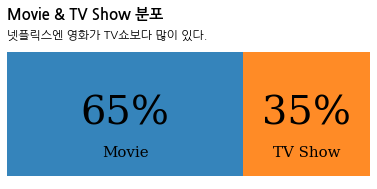

In [31]:
#컨텐츠 타입 시각화
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
         alpha=0.9)
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
         alpha=0.9)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# 제목& 부제
fig.text(0.125,1.03,'Movie & TV Show 분포',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'넷플릭스엔 영화가 TV쇼보다 많이 있다.',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#퍼센티지&인덱스 표기
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif'
                   )

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif')


# 나라별 시각화

## EDA

In [33]:
# Helper column for various plots
df['count'] = 1

# 처음에 제시된 나라만 남기는 작업
df['first_country'] = df['Production Country'].apply(lambda x: x.split(",")[0])

# 영화 나이별 등급
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['Rating'].replace(ratings_ages)
df['target_ages'].unique()

# 장르 정리

df['genre'] = df['Genres'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# 국가별 이름 정리

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

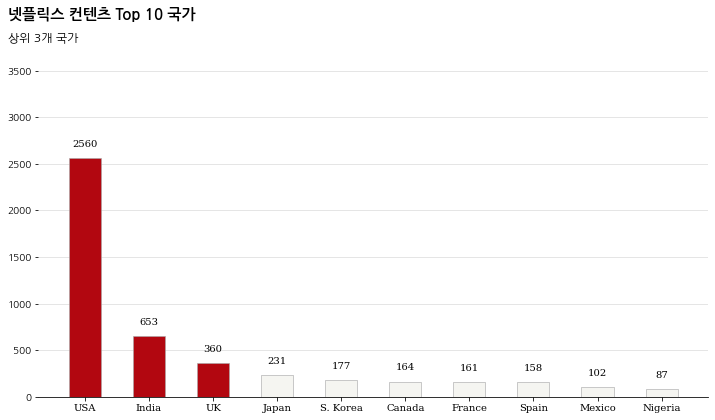

In [37]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]
# 시각화

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# 보더라인 제거

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# 국가별 레이블 설정

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# 제목& 부제

fig.text(0.09, 1, '넷플릭스 컨텐츠 Top 10 국가', fontsize=15, fontweight='bold')
fig.text(0.09, 0.95, '상위 3개 국가', fontsize=12, fontweight='light')
#인사이트
#fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
#
#fig.text(1.1, 0.67, '''
#The most prolific producers of
#content for Netflix are, primarily,
#the USA, with India and the UK
#a significant distance behind.
#
#It makes sense that the USA produces 
#the most content as, afterall, 
#Netflix is a US company.
#'''
#         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

## 국가별 컨텐츠 타입 시각화

In [45]:
import matplotlib.lines as lines

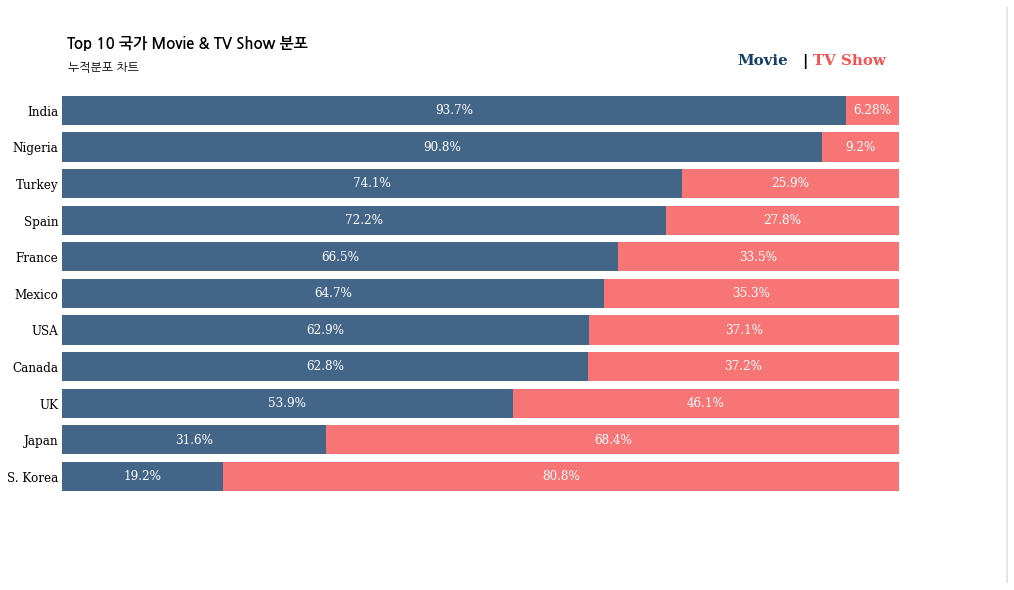

In [52]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['Content Type', 'first_country']].groupby('first_country')['Content Type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], color ='#143f6b',
         alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'],color = '#f55353',
         alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# 분포 인덱스
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 국가 Movie & TV Show 분포', fontsize=15, fontweight='bold')   
fig.text(0.131, 0.89, '누적분포 차트', fontsize=12)   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15,color ='#143f6b')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15,color ='#f55353')

#fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
#
#fig.text(1.1, 0.44, '''
#Interestingly, Netflix in India
#is made up nearly entirely of Movies. 
#
#Bollywood is big business, and perhaps
#the main focus of this industry is Movies
#and not TV Shows.
#
#South Korean Netflix on the other hand is 
#almost entirely TV Shows.
#
#The underlying resons for the difference 
#in content must be due to market research
#conducted by Netflix.
#'''
#         , fontsize=12, fontweight='light', fontfamily='serif')




l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## 등급별 시각화

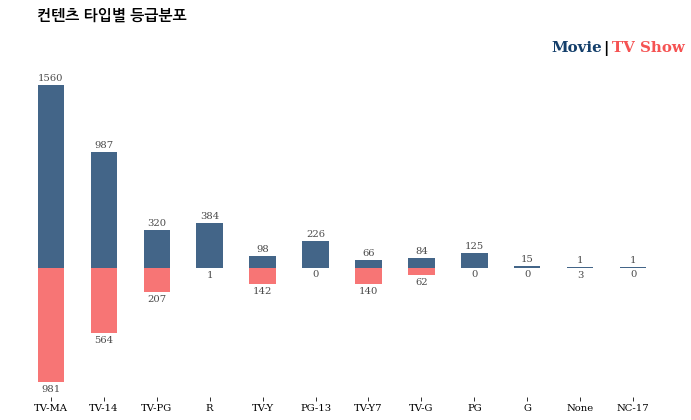

In [54]:
order = pd.DataFrame(df.groupby('Rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['Rating'])
mf = df.groupby('Content Type')['Rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#143f6b', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#f55353', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, '컨텐츠 타입별 등급분포', fontsize=15, fontweight='bold')
#fig.text(0.16, 0.89, 
#'''We observe that some ratings are only applicable to Movies. 
#The most common for both Movies & TV Shows are TV-MA and TV-14.
#'''
#
#, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#143f6b')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#f55353')

plt.show()